In [1]:
import numpy as np
import pandas as pd
import sys
# sys.path.append(r'/Users/zhouzhan/Documents/codes/python_code/liver_disease/liver_disease/')
sys.path.append(r'E:/liver_disease/liver_disease')
import constants
from sklearn.model_selection import train_test_split

In [2]:
# 汇总表-未做特征选择
PATH = constants.MERGE_CSV_PATH
df = pd.read_csv(PATH)

cols = df.columns.values.tolist()
cols.remove('INHOSPTIAL_ID');cols.remove('ZHENGHOU1')

X = df[cols] 
y = df['ZHENGHOU1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print(df.head())

   INHOSPTIAL_ID  ZHENGHOU1  身目尿黄  腹胀  发热  纳差  双下肢水肿  乏力  黑便  头晕  ...  鼻衄  \
0              3          1     1   1   0   0      0   0   0   0  ...   0   
1              5          1     1   0   1   0      0   0   0   0  ...   0   
2              6          1     0   0   0   0      0   0   0   0  ...   0   
3              7          1     1   1   0   0      0   0   0   0  ...   0   
4              8          1     0   0   1   0      0   0   0   0  ...   0   

   排便不爽  口淡无味  大便稀少  大便未解  脐疝  不能言语交流  双下肢无水肿  肝区疼痛  大便稀溏  
0     0     0     0     0   0       0       0     0     0  
1     0     0     0     0   0       0       0     0     0  
2     0     0     0     0   0       0       0     0     0  
3     0     0     0     0   0       0       0     0     0  
4     0     0     0     0   0       0       0     0     0  

[5 rows x 70 columns]


In [3]:
# 查看诊断结果的分布情况，看是否存在数据不均衡
from collections import Counter
print('证的分布情况:',Counter(df['ZHENGHOU1']))

证的分布情况: Counter({1: 214, 3: 41, 2: 6})


In [4]:
# 调参-网格搜索
import sklearn.tree as tree
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['entropy','gini'],
             'max_depth':[2,3,4,5,6,7,8],
             'min_samples_split':[4,8,12,16,20,24,28]}

In [5]:
clf = tree.DecisionTreeClassifier() 
clfcv = GridSearchCV(estimator=clf,param_grid=param_grid,cv=4) # ,scoring='roc_auc' 

In [6]:
clfcv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [4, 8, 12, 16, 20, 24, 28]})

In [7]:
test_result = clfcv.predict(X_test)

In [8]:
# 模型评估
import sklearn.metrics as metrics
print('决策树准确度：')
print(metrics.classification_report(y_test,test_result))

决策树准确度：
              precision    recall  f1-score   support

           1       0.82      0.98      0.89        43
           2       0.00      0.00      0.00         1
           3       0.50      0.11      0.18         9

    accuracy                           0.81        53
   macro avg       0.44      0.36      0.36        53
weighted avg       0.75      0.81      0.76        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
print('决策树 AUC (多分类不支持；)')
# fpr_test,tpr_test,th_test = metrics.roc_curve(y_test,test_result)
# print('AUC = %.4f' % metrics.auc(fpr_test,tpr_test))

决策树 AUC (多分类不支持；)


In [11]:
# 网格搜索最优参数
print(clfcv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 20}


In [12]:
clf2 = tree.DecisionTreeClassifier(criterion='gini',min_samples_split=20,max_depth=2)
clf2.fit(X_train,y_train)

test_res2 = clf2.predict(X_test)


In [13]:
PIC_PATH = 'E:/liver_disease/liver_disease/output/dot/user'


import graphviz
dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)
graph.render(PIC_PATH)


'E:/liver_disease/liver_disease/output/dot\\user.pdf'

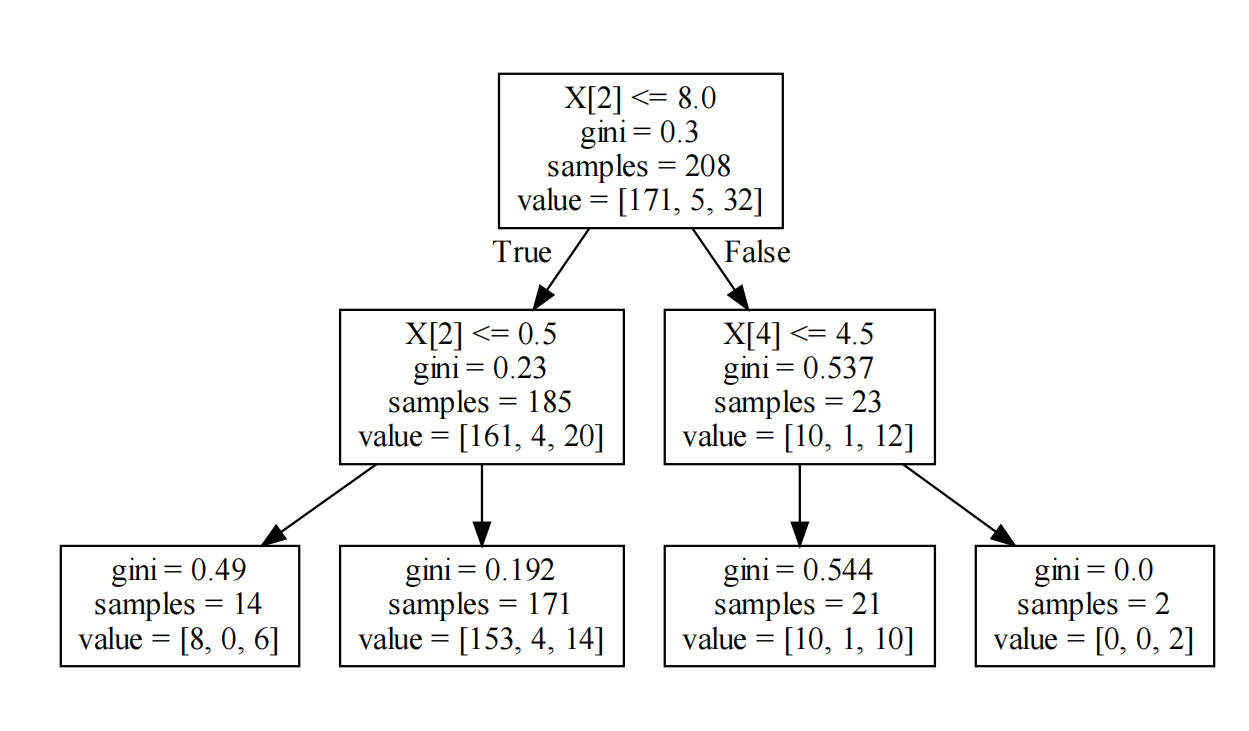

In [14]:
from PIL import Image
Image.open(PIC_PATH + '.png')

In [15]:
param_grid2 = {
    'criterion':['entropy','gini'],
    'max_depth':[5,6,7,8],
    'n_estimators':[11,13,15,20],
    'max_features':[0.3,0.4,0.5],
    'min_samples_split':[4,8,12,16],
}

In [16]:
import sklearn.ensemble as ensemble

In [17]:
rfc = ensemble.RandomForestClassifier()

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid2,cv=4)

rfc_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': [0.3, 0.4, 0.5],
                         'min_samples_split': [4, 8, 12, 16],
                         'n_estimators': [11, 13, 15, 20]})

In [18]:
predict_test = rfc_cv.predict(X_test)

print('随机森林精确度：')
print(metrics.classification_report(predict_test, y_test))


随机森林精确度：
              precision    recall  f1-score   support

           1       0.98      0.81      0.88        52
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1

    accuracy                           0.79        53
   macro avg       0.33      0.27      0.29        53
weighted avg       0.96      0.79      0.87        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# 查看最佳参数
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 0.4,
 'min_samples_split': 8,
 'n_estimators': 13}

#### 思考
针对准确度来说， 为什么随机森林的准确度低于决策树？
是因为样本本身缘故吗？

In [22]:
# 汇总表-特征选择后
PATH = constants.SELECTION_MERGE_CSV_PATH
df = pd.read_csv(PATH)

cols = df.columns.values.tolist()
cols.remove('INHOSPTIAL_ID');cols.remove('ZHENGHOU1')

X = df[cols] 
y = df['ZHENGHOU1']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

print(df.head())

   Unnamed: 0  INHOSPTIAL_ID  ZHENGHOU1  身目尿黄  双下肢水肿  乏力  黑便  腹痛  咳痰  全身胀痛  \
0           0              3          1     1      0   0   0   0   0     0   
1           1              5          1     1      0   0   0   0   0     0   
2           2              6          1     0      0   0   0   0   0     0   
3           3              7          1     1      0   0   0   0   0     0   
4           4              8          1     0      0   0   0   0   0     0   

   口苦  行走困难  欲呕  肝区疼痛  
0   0     0   0     0  
1   0     0   0     0  
2   0     0   0     0  
3   0     0   0     0  
4   0     0   0     0  


In [23]:
param_grid2 = {
    'criterion':['entropy','gini'],
    'max_depth':[5,6,7,8],
    'n_estimators':[11,13,15,20],
    'max_features':[0.3,0.4,0.5],
    'min_samples_split':[4,8,12,16],
}

In [24]:
import sklearn.ensemble as ensemble

In [25]:
rfc = ensemble.RandomForestClassifier()

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid2,cv=4)

rfc_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': [0.3, 0.4, 0.5],
                         'min_samples_split': [4, 8, 12, 16],
                         'n_estimators': [11, 13, 15, 20]})

In [26]:
predict_test = rfc_cv.predict(X_test)

print('随机森林精确度：')
print(metrics.classification_report(predict_test, y_test))

随机森林精确度：
              precision    recall  f1-score   support

           1       0.95      0.80      0.87        51
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.77        53
   macro avg       0.32      0.27      0.29        53
weighted avg       0.92      0.77      0.84        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# 查看最佳参数
rfc_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 0.3,
 'min_samples_split': 4,
 'n_estimators': 11}

In [28]:
# 再次调参
param_grid2 = {
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6],
    'n_estimators':[6,9,10,11,13],
    'max_features':[0.2,0.3,0.4],
    'min_samples_split':[2,3,4,8],
}

In [29]:
rfc = ensemble.RandomForestClassifier()

rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid2,cv=4)

rfc_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.3, 0.4],
                         'min_samples_split': [2, 3, 4, 8],
                         'n_estimators': [6, 9, 10, 11, 13]})

In [30]:
predict_test = rfc_cv.predict(X_test)

print('随机森林精确度：')
print(metrics.classification_report(predict_test, y_test))

随机森林精确度：
              precision    recall  f1-score   support

           1       0.95      0.80      0.87        51
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2

    accuracy                           0.77        53
   macro avg       0.32      0.27      0.29        53
weighted avg       0.92      0.77      0.84        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# 查看最佳参数
rfc_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 0.4,
 'min_samples_split': 3,
 'n_estimators': 10}

#### adaboost 调参
> 包括：
> 1. adaboost框架本身调参
> 2. 选择的弱分类器调参


In [32]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
# 调参
param_grid3 = {
   'algorithm':['SAMME','SAMME.R'],
    'n_estimators':[6,9,10,11,13],
    'learning_rate':[0.4,0.5,0.8,1]
}

In [50]:
model = AdaBoostClassifier()

print(model.get_params().keys())

model_cv = GridSearchCV(estimator=model, param_grid=param_grid3,cv=4)

model_cv.fit(X_train,y_train)

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])


GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.4, 0.5, 0.8, 1],
                         'n_estimators': [6, 9, 10, 11, 13]})

In [51]:
ada_predict_test = model_cv.predict(X_test)

print('adaboost 精确度：')
print(metrics.classification_report(ada_predict_test, y_test))

adaboost 精确度：
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        53
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.81        53
   macro avg       0.33      0.27      0.30        53
weighted avg       1.00      0.81      0.90        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# 查看最佳参数
model_cv.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.4, 'n_estimators': 6}

In [53]:
# 再次调参
param_grid3 = {
    'n_estimators':[4,5,6,9,10,20,50],
    'learning_rate':[0.2,0.3,0.4,0.5]
}

In [54]:
model = AdaBoostClassifier()

print(model.get_params().keys())

model_cv = GridSearchCV(estimator=model, param_grid=param_grid3,cv=4)

model_cv.fit(X_train,y_train)

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])


GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [4, 5, 6, 9, 10, 20, 50]})

In [55]:
ada_predict_test = model_cv.predict(X_test)

print('adaboost 精确度：')
print(metrics.classification_report(ada_predict_test, y_test))

adaboost 精确度：
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        53
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.81        53
   macro avg       0.33      0.27      0.30        53
weighted avg       1.00      0.81      0.90        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
# 查看最佳参数
model_cv.best_params_

{'learning_rate': 0.2, 'n_estimators': 4}

In [57]:
# 再次调参
param_grid3 = {
    'n_estimators':[2,3,4,5,100],
    'learning_rate':[0.2,0.3,0.4,0.5]
}
model = AdaBoostClassifier()

print(model.get_params().keys())

model_cv = GridSearchCV(estimator=model, param_grid=param_grid3,cv=4)

model_cv.fit(X_train,y_train)


dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])


GridSearchCV(cv=4, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4, 0.5],
                         'n_estimators': [2, 3, 4, 5, 100]})

In [58]:
ada_predict_test = model_cv.predict(X_test)

print('adaboost 精确度：')
print(metrics.classification_report(ada_predict_test, y_test))

adaboost 精确度：
              precision    recall  f1-score   support

           1       1.00      0.81      0.90        53
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.81        53
   macro avg       0.33      0.27      0.30        53
weighted avg       1.00      0.81      0.90        53



D:\Programming\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# 查看最佳参数
model_cv.best_params_

{'learning_rate': 0.2, 'n_estimators': 2}

#### Adaboost 调参总结
1. SAMME.R > SAMME
2. n_estimators=100， 多些可以增加精度

#### 问题
{'learning_rate': 0.2, 'n_estimators': 2}
奇奇怪怪，为什么弱分类器数目调参显示越少越好呢？
